<a href="https://colab.research.google.com/github/kylecata/kylecata/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Table4E.4A.csv to Table4E.4A.csv
User uploaded file "Table4E.4A.csv" with length 226 bytes


An article in Solid State Technology (May 1987)
describes an experiment to determine the effect of
flow rate on etch uniformity on a silicon wafer
used in integrated-circuit manufacturing. Three flow
rates are tested, and the resulting uniformity (in percent) is observed for six test units at each flow rate.

In [3]:
import pandas as pd
data1 = pd.read_csv('Table4E.4A.csv', sep=',', na_values=".")
data1

,Observation,Flow,Uniformity
0,1,125,2.7
1,2,125,2.6
2,3,125,4.6
3,4,125,3.2
4,5,125,3.0
5,6,125,3.8
6,1,160,4.6
7,2,160,4.9
8,3,160,5.0
9,4,160,4.2


In [4]:
FlowRate125=data1[data1['Flow']==125]['Uniformity']
FlowRate125


0    2.7
1    2.6
2    4.6
3    3.2
4    3.0
5    3.8
Name: Uniformity, dtype: float64

In [5]:
FlowRate160=data1[data1['Flow']==160]['Uniformity']
FlowRate160

6     4.6
7     4.9
8     5.0
9     4.2
10    3.6
11    4.2
Name: Uniformity, dtype: float64

In [6]:
FlowRate200=data1[data1['Flow']==200]['Uniformity']
FlowRate200

12    4.6
13    2.9
14    3.4
15    3.5
16    4.1
17    5.1
Name: Uniformity, dtype: float64

In [7]:
FlowRate125=data1[data1['Flow']==125]['Uniformity']
FlowRate160=data1[data1['Flow']==160]['Uniformity']
FlowRate200=data1[data1['Flow']==200]['Uniformity']

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observation  18 non-null     int64  
 1   Flow         18 non-null     int64  
 2   Uniformity   18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 560.0 bytes


In [9]:
stat, p = f_oneway(FlowRate125, FlowRate160, FlowRate200)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Likely the same distribution')
else:
  print('Likely a different distribution')

stat=3.586, p=0.053
Likely the same distribution


(a) Does flow rate affect etch uniformity?
Answer this question by using an analysis of
variance with a = 0.05.

Flow rate doesn't affect etch uniformity. After performing an f-test, a p-value of 0.053 was calculated. Since p-value(0.053) > alpha(0.05), there is not a statistically signifigance difference between the variances. We fail to reject the null hypothesis.

In [10]:
model = ols('Uniformity ~ C(Flow)', data= data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Flow),3.647778,2.0,3.585627,0.053365
Residual,7.630000,15.0,NaN,NaN


In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Uniformity   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     3.586
Date:                Fri, 23 Sep 2022   Prob (F-statistic):             0.0534
Time:                        07:16:44   Log-Likelihood:                -17.816
No. Observations:                  18   AIC:                             41.63
Df Residuals:                      15   BIC:                             44.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3167      0.291     11.

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [12]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F)
C(Flow),3.647778,2.0,1.823889,3.585627,0.053365
Residual,7.630000,15.0,0.508667,NaN,NaN


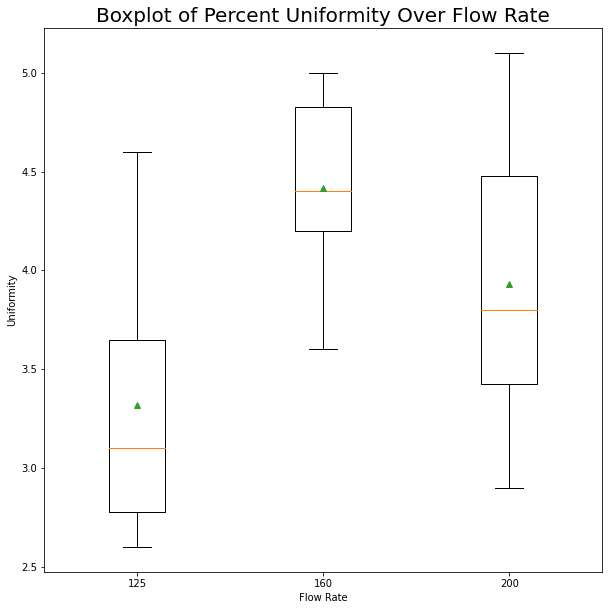

In [13]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)


ax.set_title("Boxplot of Percent Uniformity Over Flow Rate" , fontsize= 20)
ax.set


data1=[FlowRate125, FlowRate160, FlowRate200]

ax.boxplot(data1,
           labels= ['125', '160', '200'], showmeans= True)

plt.xlabel("Flow Rate")
plt.ylabel("Uniformity")

plt.show()

Construct a box plot of the etch uniformity data.
Use this plot, together with the analysis of variance results, to determine which gas flow rate
would be best in terms of etch uniformity (a
small percentage is best).
Determination: First, my previous finding supported that the variance between the flow rates was not statistically signifigant different meaning variance is equal among flow rates. Because of this, each flow rate has the same distribution and therefore we want to select the flow rate with the lowest etch percent uniformity, 125.

In [14]:
prediction=model.predict()
prediction

array([3.31666667, 3.31666667, 3.31666667, 3.31666667, 3.31666667,
       3.31666667, 4.41666667, 4.41666667, 4.41666667, 4.41666667,
       4.41666667, 4.41666667, 3.93333333, 3.93333333, 3.93333333,
       3.93333333, 3.93333333, 3.93333333])

In [15]:
model.rsquared

0.32344827586206915

In [16]:
model.rsquared_adj

0.23324137931034505

In [17]:
residuals=model.resid
residuals

0    -0.616667
1    -0.716667
2     1.283333
3    -0.116667
4    -0.316667
5     0.483333
6     0.183333
7     0.483333
8     0.583333
9    -0.216667
10   -0.816667
11   -0.216667
12    0.666667
13   -1.033333
14   -0.533333
15   -0.433333
16    0.166667
17    1.166667
dtype: float64

In [18]:
se= model.mse_resid
se

0.5086666666666665

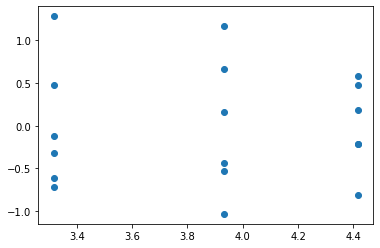

In [20]:
plt.scatter(prediction, residuals)

plt.show()

(c) Plot the residuals versus predicted flow.
Interpret this plot
The residual versus predicted plot is approxamately normal. The standard error is about 0.5 and that't how far apart the plot shows the values from each other.

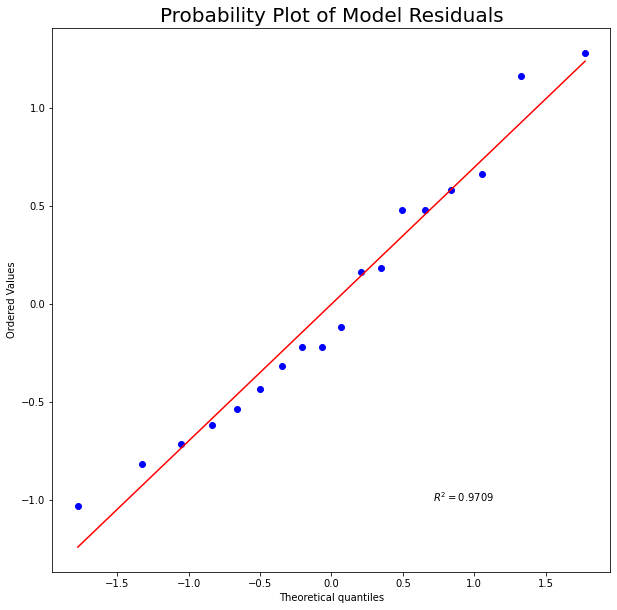

In [21]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability Plot of Model Residuals", fontsize= 20)
ax.set

plt.show()

(d) Does the normality assumption seem reasonable
in this problem?
The normality assumption seems reasonable in the problem. I concluded that by administering the fat pencil test.

In [22]:
mean1= FlowRate125.mean()
mean1

3.316666666666667

In [23]:
mean2= FlowRate160.mean()
mean2

4.416666666666667

In [24]:
mean3= FlowRate200.mean()
mean3

3.9333333333333336

In [25]:
resmean2 = 	0.5086666666666665
n = 6
scale = math.sqrt(resmean2/n)
scale

0.291166237358966

In [26]:
mean1, mean2, mean3

(3.316666666666667, 4.416666666666667, 3.9333333333333336)

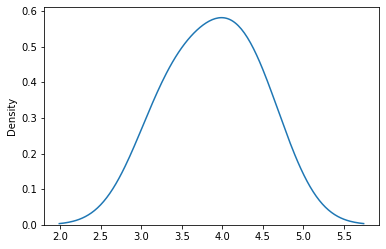

In [27]:
import seaborn as sns 
sns.kdeplot((mean1, mean2, mean3))

Does this analysis indicate that there
are differences in mean etch uniformity at the different flow rates? Which flows produce different
results?
After scaling my t-test with a factor of 0.3, the distribution curve appears to be a normal bell-shape curve. This tells us that variance is equal between the flow rates and therefore the means are also equal.

In [28]:
X = 31.400
m = 30
se_mean = .336
z = (X-m)/se_mean
z

4.1666666666666625

In [29]:
p_value = scipy.stats.norm.sf(abs(z))*2
p_value

3.09085937645925e-05

(a) Fill in the missing values. What conclusions
would you draw?
Z is equal to 4.1666666666666625 and the p-value is 3.09085937645925e-05.


(b) Is this a one-sided or two-sided test?
Two-sided test


In [30]:
meanCI = 31.400
SD = 0.336
stats.t.interval(0.95, df=14, loc=31.400, scale=0.336)

(30.679351672859912, 32.12064832714009)

(c) Use the output and a normal table to find a 95%
CI on the mean.

(d) How was the SE mean calculated? It was given in the problem.

In [31]:
p_value = scipy.stats.norm.sf(abs(z))
p_value

1.545429688229625e-05

(e) What would the p-value be if the alternative hypothesis is mu is greater than 30?

In [32]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Table4.10.csv to Table4.10.csv
User uploaded file "Table4.10.csv" with length 238 bytes


In [33]:
import pandas as pd
data2 = pd.read_csv('Table4.10.csv', sep=',', na_values=".")
data2

,Horsepower,rpm,Octane,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


In [34]:
from matplotlib.ticker import rcParams
Horsepower = data2['Horsepower']
rpm = data2['rpm']
Octane = data2['Octane']
Compression = data2['Compression']

In [35]:
model2 = ols('Horsepower ~ Compression + rpm + Octane', data=data2).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
Compression,947.826275,1.0,12.205113,0.008155
rpm,443.443935,1.0,5.710206,0.043883
Octane,1070.226974,1.0,13.781261,0.005937
Residual,621.265062,8.0,NaN,NaN


In [36]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Horsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Fri, 23 Sep 2022   Prob (F-statistic):            0.00317
Time:                        07:17:59   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -266.0312     92.674     -2.871      

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


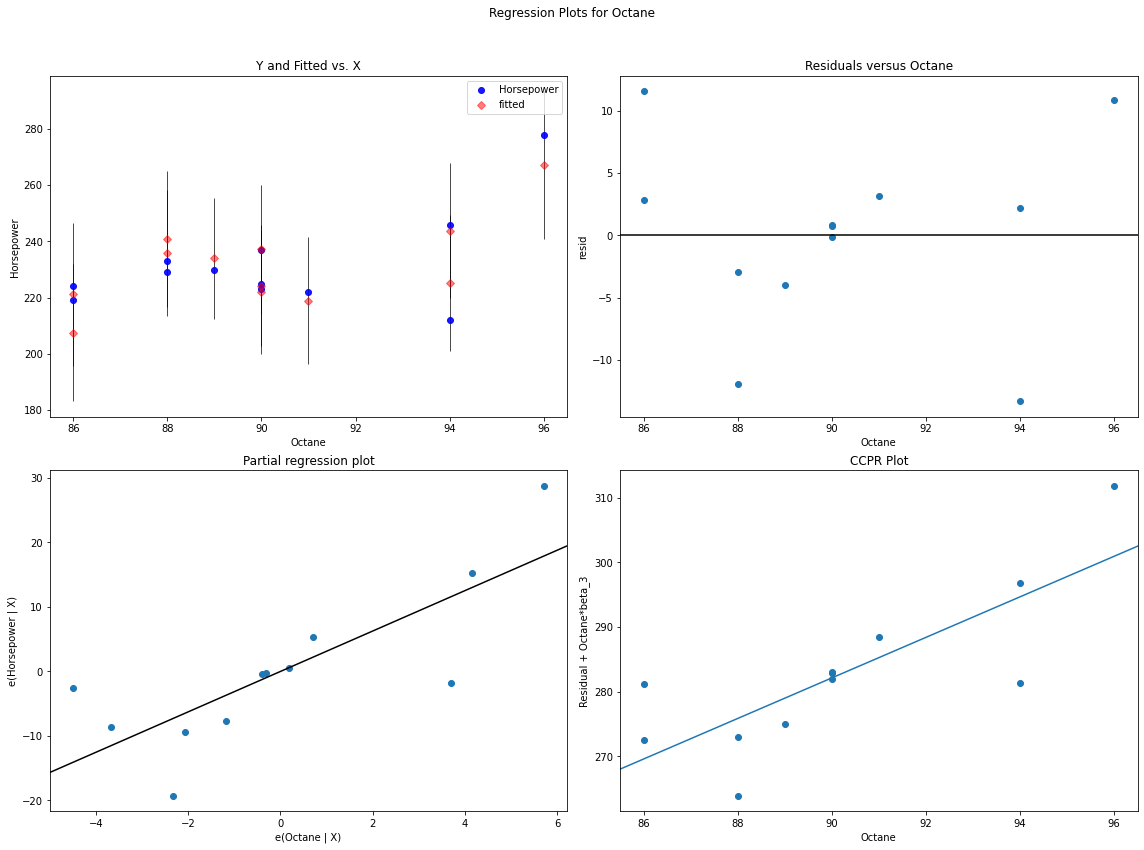

In [37]:
fig = plt.figure(figsize=(16,12))
fig = sm.graphics.plot_regress_exog(model2, 'Octane', fig=fig)

The brake horsepower developed by an automobile
engine on a dynamometer is thought to be a function
of the engine speed in revolutions per minute (rpm),
the road octane number of the fuel, and the engine
compression. An experiment is run in the laboratory
and the data are drawn in Table 4E.10:

(a) Fit a multiple regression model to these data.
Pictured above.

(b) Test for significance of regression. What conclusions can you draw?
The f-test produces a f-statistic of 11.12. This means we will have low p-values.

(c) Based on t-tests, do you need all three regressor
variables in the model?
Yes since all three regressor variables are below alpha of 0.05. They are all statistically signifigant.